# Composites simulation :  perform parametric analyses

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simmit import smartplus as sim
from simmit import identify as iden
import os
import itertools

dir = os.path.dirname(os.path.realpath('__file__'))

We need to import here the data, modify them if needed and proceed

In [2]:
umat_name = 'MIMTN' #This is the 5 character code for the Mori-Tanaka homogenization for composites with a matrix and ellipsoidal reinforcments
nstatev = 0

rho = 1.12 #The density of the material (overall)
c_p = 1.64 #The specific heat capacity (overall)

nphases = 2 #The number of phases
num_file = 0 #The num of the file that contains the subphases
int1 = 50
int2 = 50
n_matrix = 0

props = np.array([nphases, num_file, int1, int2, n_matrix])

NPhases_file = dir + '/keys/Nellipsoids0.dat'
NPhases = pd.read_csv(NPhases_file, delimiter=r'\s+', index_col=False, engine='python')
NPhases[::]


,Number,Coatingof,umat,save,c,psi_mat,theta_mat,phi_mat,a1,a2,a3,psi_geom,theta_geom,phi_geom,nprops,nstatev,props
0,0,0,ELISO,1,@2p,0.,0.0,0.0,1,1,1,0.,0.0,0.0,3,1,3450
1,1,0,ELISO,1,@3p,@0p,0.0,0.0,@1p,1,1,@0p,0.0,0.0,3,1,73000


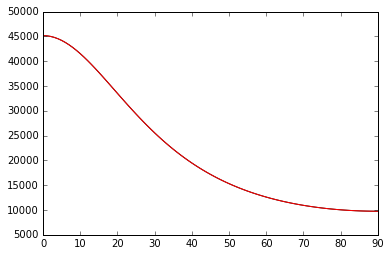

In [4]:
path_data = dir + '/data'
path_keys = dir + '/keys'
pathfile = 'path.txt'
outputfile = 'results_PLN.txt'

nparams = 4

param_list = iden.read_parameters(nparams)

rho = 1.12 #The density of the material 
c_p = 1.64 #The specific heat capacity

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

alpha = np.arange(0.,91.,1)
param_list[1].value = 100 
param_list[2].value = 0.4 
param_list[3].value = 1.0 - param_list[2].value

E_L = np.zeros(len(alpha))
fig = plt.figure()

for i, x in enumerate (alpha):
 
    param_list[0].value = x
    
    iden.copy_parameters(param_list, path_keys, path_data)
    iden.apply_parameters(param_list, path_data)

    L = sim.L_eff(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, path_data)
    p = sim.L_ortho_props(L)
    E_L[i] = p[0]


plt.plot(alpha,E_L, c='black')

umat_name = 'MISCN' #This is the 5 character code for the Mori-Tanaka homogenization for composites with a matrix and ellipsoidal reinforcments
for i, x in enumerate (alpha):
 
    param_list[0].value = x
    
    iden.copy_parameters(param_list, path_keys, path_data)
    iden.apply_parameters(param_list, path_data)

    L = sim.L_eff(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, path_data)
    p = sim.L_ortho_props(L)
    E_L[i] = p[0]


plt.plot(alpha,E_L, c='red')


plt.show()

Now let's study the evolution of the concentration

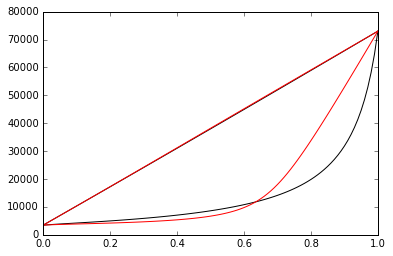

In [5]:
param_list[0].value = 0.0
param_list[1].value = 100

c = np.arange(0.,1.01,0.01)
E_L = np.zeros(len(c))
E_T = np.zeros(len(c))

umat_name = 'MIMTN' #This is the 5 character code for the Mori-Tanaka homogenization for composites with a matrix and ellipsoidal reinforcments
for i, x in enumerate (c):
 
    param_list[3].value = x
    param_list[2].value = 1.0 - param_list[3].value 
    
    iden.copy_parameters(param_list, path_keys, path_data)
    iden.apply_parameters(param_list, path_data)

    L = sim.L_eff(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, path_data)
    p = sim.L_ortho_props(L)
    E_L[i] = p[0]
    E_T[i] = p[1]   

fig = plt.figure()
plt.plot(c,E_L, c='black')
plt.plot(c,E_T, c='black')

umat_name = 'MISCN' #This is the 5 character code for the Mori-Tanaka homogenization for composites with a matrix and ellipsoidal reinforcments
for i, x in enumerate (c):
 
    param_list[3].value = x
    param_list[2].value = 1.0 - param_list[3].value 
    
    iden.copy_parameters(param_list, path_keys, path_data)
    iden.apply_parameters(param_list, path_data)

    L = sim.L_eff(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, path_data)
    p = sim.L_ortho_props(L)
    E_L[i] = p[0]
    E_T[i] = p[1]   

plt.plot(c,E_L, c='red')
plt.plot(c,E_T, c='red')

plt.show()
